DataFrame exported to 'combined_portfolio_returns.csv'


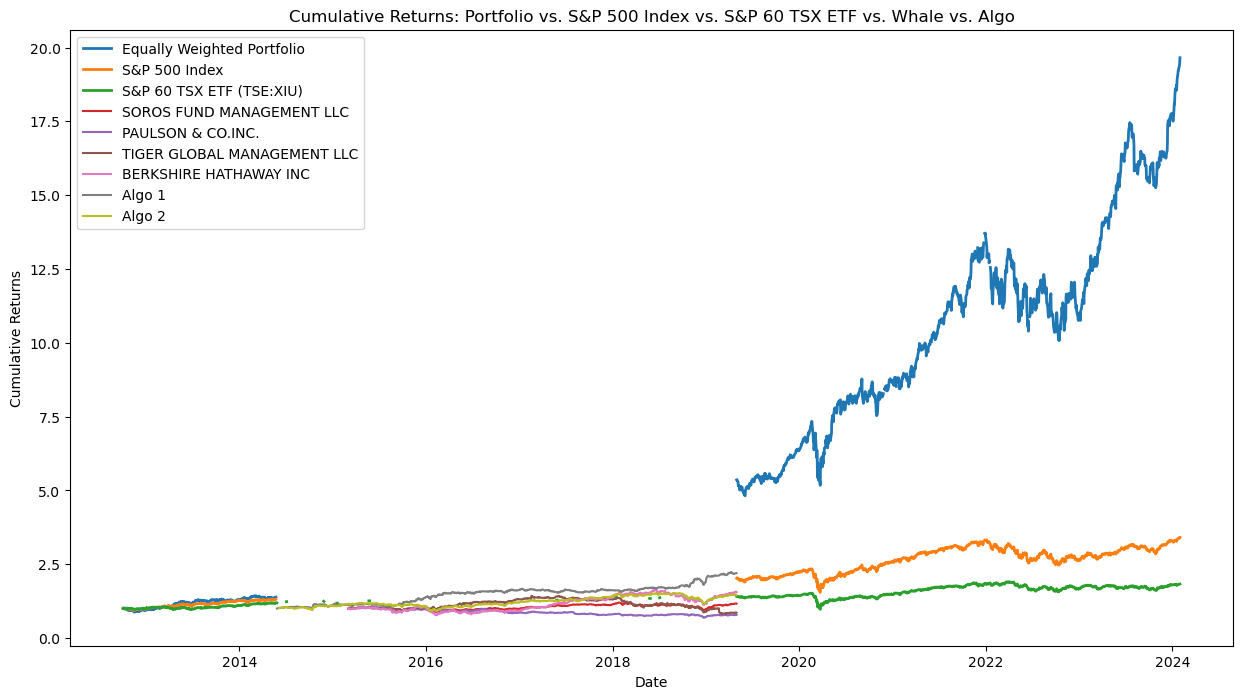

Annualized Standard Deviation of Equally Weighted Portfolio:
   Annualized Standard Deviation
0                       0.229788


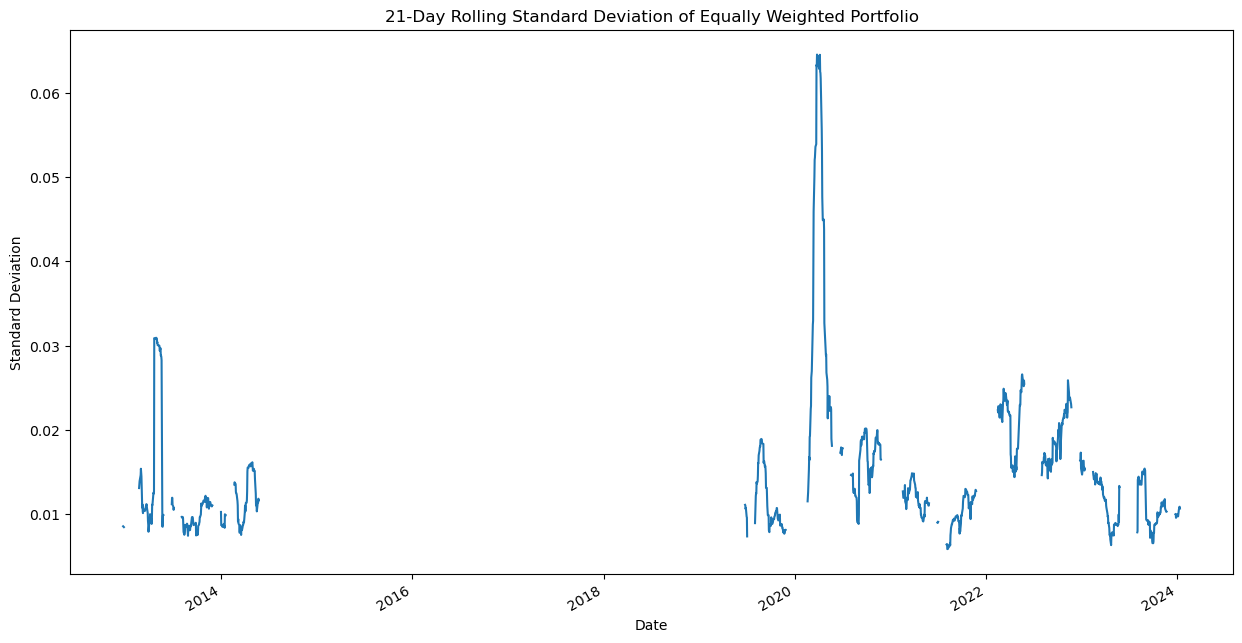

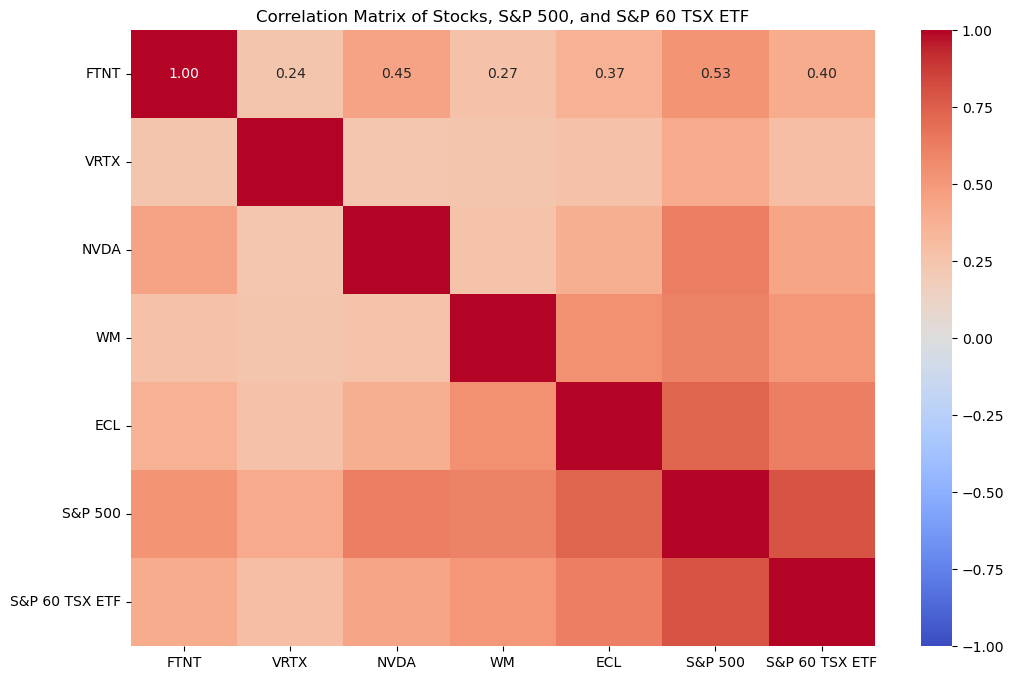

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to parse dates and keep only the date part
def parse_date(date):
    return pd.to_datetime(date).date()

# Read the custom stock data with date parser
ftnt = pd.read_csv('FTNT.csv', index_col='Date', parse_dates=['Date'])
vrtx = pd.read_csv('VRTX.csv', index_col='Date', parse_dates=['Date'])
nvda = pd.read_csv('NVDA.csv', index_col='Date', parse_dates=['Date'])
wm = pd.read_csv('WM.csv', index_col='Date', parse_dates=['Date'])
ecl = pd.read_csv('ECL.csv', index_col='Date', parse_dates=['Date'])

# Read the S&P 500 Index data and S&P 60 TSX ETF data with date parser
sp500 = pd.read_csv('SP500_INDEXSP_INX.csv', index_col='Date', parse_dates=['Date'])
sp60 = pd.read_csv('SP60_TSE_XIU.csv', index_col='Date', parse_dates=['Date'])

# Read and clean the whale_returns and algo_returns data with date parser
whale = pd.read_csv('whale_returns.csv', index_col='Date', parse_dates=['Date'])
algo = pd.read_csv('algo_returns.csv', index_col='Date', parse_dates=['Date'])

# Calculate daily returns for each stock
daily_returns_stocks = pd.concat([
    ftnt['Close'].pct_change(),
    vrtx['Close'].pct_change(),
    nvda['Close'].pct_change(),
    wm['Close'].pct_change(),
    ecl['Close'].pct_change()
], axis=1)

# Calculate the equally weighted portfolio returns
weights = np.array([1/5, 1/5, 1/5, 1/5, 1/5])
equally_weighted_portfolio = daily_returns_stocks.dot(weights)

# Create a DataFrame for the equally weighted portfolio
ewp_df = pd.DataFrame(equally_weighted_portfolio, columns=['Equally Weighted Portfolio'])

# Combine with the other data
combined_returns = pd.concat([
    ewp_df,
    sp500['Close'].pct_change(),
    sp60['Close'].pct_change(),
    whale,
    algo
], axis=1)

# Set the column names
combined_returns.columns = [
    'Equally Weighted Portfolio',
    'S&P 500 Index',
    'S&P 60 TSX ETF',
    *whale.columns, 
    *algo.columns
]

# Export the final DataFrame to a CSV file
combined_returns.to_csv('combined_portfolio_returns.csv', index=True)
print("DataFrame exported to 'combined_portfolio_returns.csv'")

# Calculate cumulative returns for the portfolio, S&P 500, S&P 60 TSX ETF, Whale Returns, and Algo Returns
portfolio_cumulative_returns = (1 + combined_returns['Equally Weighted Portfolio']).cumprod()
sp500_cumulative_returns = (1 + combined_returns['S&P 500 Index']).cumprod()
sp60_cumulative_returns = (1 + combined_returns['S&P 60 TSX ETF']).cumprod()
whale_cumulative_returns = (1 + whale).cumprod()
algo_cumulative_returns = (1 + algo).cumprod()

# Plotting the portfolio's cumulative returns alongside the S&P 500's, S&P 60 TSX ETF's, Whale Returns', and Algo Returns' cumulative returns
plt.figure(figsize=(15, 8))
plt.plot(portfolio_cumulative_returns, label='Equally Weighted Portfolio', linewidth=2)
plt.plot(sp500_cumulative_returns, label='S&P 500 Index', linewidth=2)
plt.plot(sp60_cumulative_returns, label='S&P 60 TSX ETF (TSE:XIU)', linewidth=2)

# Plot each whale and algo return individually
for column in whale.columns:
    plt.plot(whale_cumulative_returns[column], label=column)

for column in algo.columns:
    plt.plot(algo_cumulative_returns[column], label=column)

plt.title('Cumulative Returns: Portfolio vs. S&P 500 Index vs. S&P 60 TSX ETF vs. Whale vs. Algo')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Calculate the standard deviation of daily returns for the equally weighted portfolio
std_dev_daily = combined_returns['Equally Weighted Portfolio'].std()

# Annualize the standard deviation (assuming 252 trading days per year)
std_dev_annualized = std_dev_daily * np.sqrt(252)

# Creating DataFrame
std_dev_df = pd.DataFrame({'Annualized Standard Deviation': [std_dev_annualized]})
print("Annualized Standard Deviation of Equally Weighted Portfolio:")
print(std_dev_df)

# Calculate the rolling standard deviation with a 21-day window for the equally weighted portfolio
rolling_std_21 = combined_returns['Equally Weighted Portfolio'].rolling(window=21).std()

# Plotting the rolling standard deviation
plt.figure(figsize=(15, 8))
rolling_std_21.plot(title='21-Day Rolling Standard Deviation of Equally Weighted Portfolio')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.show()

# Combine the daily returns of individual stocks and indices into a single DataFrame
stock_indices_returns = pd.concat([
    daily_returns_stocks,  # This contains the individual stock returns
    sp500['Close'].pct_change(),  # S&P 500 daily returns
    sp60['Close'].pct_change()    # S&P 60 TSX ETF daily returns
], axis=1)

# Rename the columns for clarity
stock_indices_returns.columns = ['FTNT', 'VRTX', 'NVDA', 'WM', 'ECL', 'S&P 500', 'S&P 60 TSX ETF']

# Calculate the correlation matrix
correlation_matrix = stock_indices_returns.corr()

# Plotting the correlation matrix with formatted annotations
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Matrix of Stocks, S&P 500, and S&P 60 TSX ETF")

# Setting the rotation for the y-axis labels to be horizontal
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.show()

